In [1]:
import pandas as pd
metadata = pd.read_csv("ncbi_datasets.csv")

C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_14472\1760679425.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("ncbi_datasets.csv")


In [2]:
metadata.head()

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


In [3]:
metadata.shape

(847791, 16)

In [4]:
metadata["Collection Date"] = pd.to_datetime(metadata["Collection Date"])

In [5]:
metadata.columns = [c.lower().replace(" ", "_") for c in metadata.columns]

In [6]:
metadata.columns

Index(['nucleotide_accession', 'species_taxonomy_id', 'species_name',
       'virus_genus', 'virus_family', 'isolate_name', 'nucleotide_length',
       'sequence_type', 'nuc_completeness', 'geo_location', 'us_state',
       'host_name', 'host_taxonomy_id', 'collection_date', 'bioproject',
       'biosample'],
      dtype='object')

In [7]:
metadata["continent"] = metadata["geo_location"].str.replace(";.+", "", regex=True)


In [8]:
metadata.groupby("continent").apply(lambda x: x.sort_values("collection_date").iloc[0])


,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
continent,,,,,,,,,,,,,,,,,
Africa,OL336607.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/MLI/M00960/2020,29890,GenBank,complete,Africa; Mali,NaN,NaN,9606,2020-02-06,NaN,NaN,Africa
Asia,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
Europe,OU393175.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,29890,GenBank,complete,Europe; United Kingdom:England,NaN,NaN,9606,2020-01-01,PRJEB37886,SAMEA9354774,Europe
North America,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America
Oceania,MW320919.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/AUS/VIC16874/2020,29790,GenBank,complete,Oceania; Australia: Victoria,NaN,NaN,9606,2020-01-01,NaN,SAMN16975285,Oceania
South America,MZ477858.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/BRA/PR-HF441/2020,29779,GenBank,complete,South America; Brazil: Parana,NaN,NaN,9606,2020-01-01,NaN,NaN,South America


In [9]:
metadata["continent"].value_counts()

North America    571069
Europe           254520
Oceania           10603
Asia               8581
Africa             2192
South America       755
Name: continent, dtype: int64

In [10]:
metadata["nucleotide_length"].describe()

count    847791.000000
mean      29825.747932
std          69.937482
min        2859.000000
25%       29786.000000
50%       29819.000000
75%       29884.000000
max       30018.000000
Name: nucleotide_length, dtype: float64

In [11]:
metadata[metadata["nucleotide_length"] == metadata["nucleotide_length"].min()]


,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
847723,LR877184.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,2859,GenBank,complete,"Europe; Sweden:Stockholm, Sweden",NaN,NaN,9606,2020-04-26,PRJEB39632,SAMEA7098098,Europe


In [12]:
sample_month = pd.Series(metadata["collection_date"].values.astype("<M8[M]"))


<AxesSubplot:>

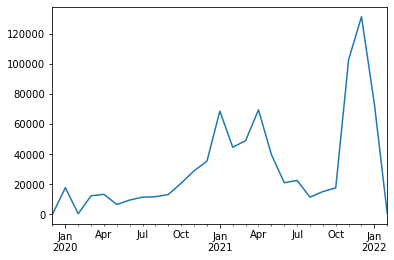

In [13]:
sample_month.value_counts().sort_index().plot()

In [14]:
metadata[metadata["sequence_type"] == "RefSeq"]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia


In [15]:
metadata[metadata["isolate_name"].str.contains("Delta").fillna(False)]


,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-14,NaN,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
251375,OK091006.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,"SARS-CoV-2/human/JPN/SARS-CoV-2, B.1.617.2 lin...",29836,GenBank,complete,Asia; Japan,NaN,NaN,9606,2021-08-24,NaN,NaN,Asia
665095,OM108132.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-2/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-11,NaN,NaN,Asia


In [16]:
metadata[metadata["isolate_name"].str.contains("Omicron").fillna(False)]


,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


In [17]:
import os

sequences = ["NC_045512.2", "OL467832.1", "OM061695.1",  "OM095411.1"]
human_names = ["reference", "base", "delta", "omicron"]


In [18]:
selected_sequences = metadata[metadata["nucleotide_accession"].isin(sequences)]


In [19]:
selected_sequences

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
254609,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


In [20]:
!pip install biopython

In [21]:
from Bio import Entrez
Entrez.email = "wantazulfikri12@gmail.com"

In [22]:
def download_sequence(id_code):
    handle = Entrez.esearch(db="nucleotide", term=id_code, retmax="1")
    record = Entrez.read(handle)
    handle = Entrez.efetch(db="nucleotide", id=record["IdList"][0], rettype="fasta", retmode="text")
    return handle.read()

In [23]:
sequence_data = {}
for sequence in sequences:
    sequence_data[sequence] = {"fasta": download_sequence(sequence)}


In [24]:
from Bio import SeqIO
import io 

for k,v in sequence_data.items():
    f = io.StringIO(v["fasta"])
    sequence_data[k]["parsed"] = list(SeqIO.parse(f, "fasta"))[0]


In [25]:
sequence_data["NC_045512.2"]["parsed"]

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [26]:
sequence_data["OM095411.1"]["parsed"]

SeqRecord(seq=Seq('CAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTG...AGC'), id='OM095411.1', name='OM095411.1', description='OM095411.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/Omicron-1/2021, complete genome', dbxrefs=[])

In [27]:
from Bio import Align
aligner = Align.PairwiseAligner()


In [28]:
aligner.algorithm

'Needleman-Wunsch'

In [29]:
score = aligner.score(sequence_data["NC_045512.2"]["parsed"].seq, sequence_data["OM061695.1"]["parsed"].seq)
score

29818.0

In [30]:
import numpy as np 

comparisons = np.zeros((4,4))

for i in range(0,4):
    for j in range(0,i+1):
        score = aligner.score(sequence_data[sequences[i]]["parsed"].seq, sequence_data[sequences[j]]["parsed"].seq)
        comparisons[i,j] = score

In [31]:
comparison_df = pd.DataFrame(comparisons, columns=human_names, index=human_names)


In [32]:
comparison_df

,reference,base,delta,omicron
reference,29903.0,0.0,0.0,0.0
base,29820.0,29831.0,0.0,0.0
delta,29818.0,29775.0,29858.0,0.0
omicron,29725.0,29722.0,29688.0,29788.0


In [33]:
comparison_df.iloc[:,0] / 29903

reference    1.000000
base         0.997224
delta        0.997157
omicron      0.994047
Name: reference, dtype: float64

In [34]:
seq1 = sequence_data["NC_045512.2"]["parsed"].seq
seq2 = sequence_data["OM061695.1"]["parsed"].seq
delta_alignments = aligner.align(seq1, seq2)

In [35]:
delta_alignments

In [36]:
delta_alignment = delta_alignments[0]

In [37]:
delta_alignment.shape

(2, 29943)

In [38]:
delta_alignment.aligned

(((0, 209),
  (210, 212),
  (212, 240),
  (241, 1047),
  (1048, 1273),
  (1274, 1276),
  (1276, 3036),
  (3037, 3038),
  (3038, 4180),
  (4181, 6401),
  (6402, 7123),
  (7123, 7124),
  (7125, 8985),
  (8986, 8989),
  (8989, 9052),
  (9053, 9054),
  (9054, 10028),
  (10028, 10029),
  (10030, 10506),
  (10507, 11116),
  (11117, 11200),
  (11201, 11331),
  (11332, 11333),
  (11333, 14407),
  (14408, 14409),
  (14409, 15450),
  (15450, 15451),
  (15452, 16465),
  (16466, 19219),
  (19220, 19221),
  (19221, 21617),
  (21618, 21986),
  (21987, 22028),
  (22029, 22030),
  (22033, 22035),
  (22037, 22916),
  (22917, 22918),
  (22918, 22994),
  (22995, 22996),
  (22996, 23402),
  (23403, 23603),
  (23604, 24409),
  (24410, 24411),
  (24411, 25087),
  (25088, 25090),
  (25090, 25351),
  (25352, 25353),
  (25353, 25468),
  (25469, 26423),
  (26424, 26425),
  (26425, 26766),
  (26767, 26768),
  (26768, 27526),
  (27527, 27637),
  (27637, 27639),
  (27640, 27751),
  (27752, 27873),
  (27874, 27876)

In [39]:
seq1_end = None
seq2_end = None
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    
    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end:alignments[0][0]]
        seq2_mismatch = seq2[seq2_end:alignments[1][0]]
        print("1: {}".format(seq1_mismatch))
        print("2: {}".format(seq2_mismatch))
    
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

1: G
2: 
1: 
2: T
1: C
2: T
1: G
2: T
1: G
2: 
1: 
2: T
1: C
2: 
1: 
2: T
1: G
2: T
1: C
2: T
1: 
2: T
1: C
2: 
1: C
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: 
2: T
1: C
2: 
1: C
2: T
1: A
2: R
1: A
2: G
1: A
2: 
1: 
2: G
1: C
2: 
1: 
2: T
1: 
2: A
1: G
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: C
2: G
1: G
2: A
1: A
2: 
1: TTC
2: 
1: AG
2: 
1: T
2: 
1: 
2: G
1: C
2: 
1: 
2: A
1: A
2: G
1: C
2: G
1: G
2: 
1: 
2: A
1: G
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: C
2: T
1: T
2: 
1: 
2: C
1: T
2: 
1: 
2: C
1: C
2: T
1: 
2: C
1: T
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: G
2: 
1: TT
2: 
1: A
2: 
1: CT
2: 
1: A
2: 
1: A
2: G
1: 
2: T
1: G
2: 
1: 
2: T
1: G
2: 
1: G
2: T
1: G
2: T


In [40]:
from IPython.display import HTML

In [42]:
def color_print(s, color='black'):
    return "<span style='color:{}'>{}</span>".format(color, s)


In [43]:
seq1_end = None
seq2_end = None
display_seq = []
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    
    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end:alignments[0][0]]
        seq2_mismatch = seq2[seq2_end:alignments[1][0]]
        if len(seq2_mismatch)==0:
            display_seq.append(color_print(seq1[seq1_end:alignments[0][0]], "red"))
        elif len(seq1_mismatch)==0:
            display_seq.append(color_print(seq2[seq2_end:alignments[1][0]], "green"))
        else:
            display_seq.append(color_print(seq2[seq2_end:alignments[1][0]], "blue"))
    
    display_seq.append(seq1[alignments[0][0]:alignments[0][1]])
    
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

In [44]:
display_seq = [str(i) for i in display_seq]

In [45]:
display(HTML('<br>'.join(display_seq)))